**Importing Libraries**

In [47]:
!pip install --upgrade scikit-learn imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

**Importing Data**

In [48]:
df  = pd.read_csv("/kaggle/input/flight-delays/flights.csv")
print(f"Dataset shape: {df.shape}")
print(df.info())
print(df.head())

Dataset shape: (5819079, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIV

**Checking Duplicate Rows**

In [49]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


**Missing Value Analysis**

In [50]:
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

Missing Values Analysis:
                 Column  Missing_Count  Missing_Percentage
25  CANCELLATION_REASON        5729195           98.455357
30        WEATHER_DELAY        4755640           81.724960
29  LATE_AIRCRAFT_DELAY        4755640           81.724960
28        AIRLINE_DELAY        4755640           81.724960
27       SECURITY_DELAY        4755640           81.724960
26     AIR_SYSTEM_DELAY        4755640           81.724960
16             AIR_TIME         105071            1.805629
22        ARRIVAL_DELAY         105071            1.805629
15         ELAPSED_TIME         105071            1.805629
18            WHEELS_ON          92513            1.589822
19              TAXI_IN          92513            1.589822
21         ARRIVAL_TIME          92513            1.589822
12             TAXI_OUT          89047            1.530259
13           WHEELS_OFF          89047            1.530259
11      DEPARTURE_DELAY          86153            1.480526
10       DEPARTURE_TIME        

In [51]:
print(df.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

**Creating Date Column**

In [52]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

total_flights = len(df)
cancelled_flights = df['CANCELLED'].sum()
diverted_flights = df['DIVERTED'].sum()
on_time_flights = len(df[(df['DEPARTURE_DELAY'] <= 0) & (df['CANCELLED'] == 0)])

print(f"Total Flights: {total_flights:,}")
print(f"Cancelled Flights: {cancelled_flights:,} ({cancelled_flights/total_flights*100:.2f}%)")
print(f"Diverted Flights: {diverted_flights:,} ({diverted_flights/total_flights*100:.2f}%)")
print(f"On-time Flights: {on_time_flights:,} ({on_time_flights/total_flights*100:.2f}%)")

Total Flights: 5,819,079
Cancelled Flights: 89,884 (1.54%)
Diverted Flights: 15,187 (0.26%)
On-time Flights: 3,606,117 (61.97%)


**Monthly Flight Volume**

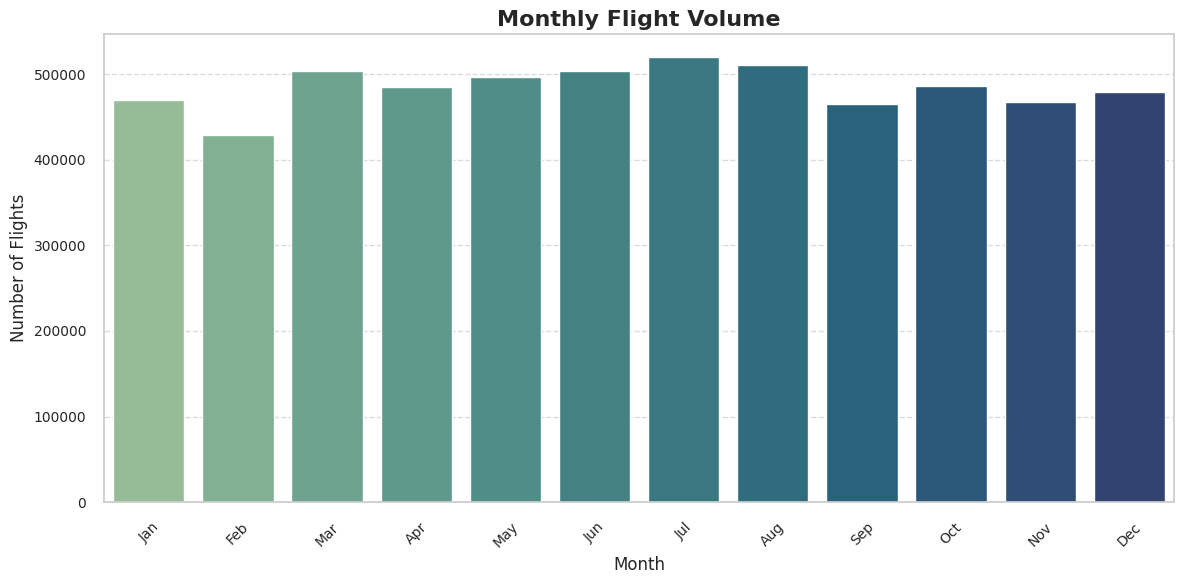

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

monthly_flights = df.groupby('MONTH').size().reset_index(name='Flight_Count')
monthly_flights['Month_Name'] = monthly_flights['MONTH'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})


sns.set_theme(style="whitegrid")  
plt.figure(figsize=(12, 6))

sns.barplot(
    data=monthly_flights,
    x='Month_Name',
    y='Flight_Count',
    palette="crest"   
)

plt.title('Monthly Flight Volume', fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

**Day of Week Analysis**

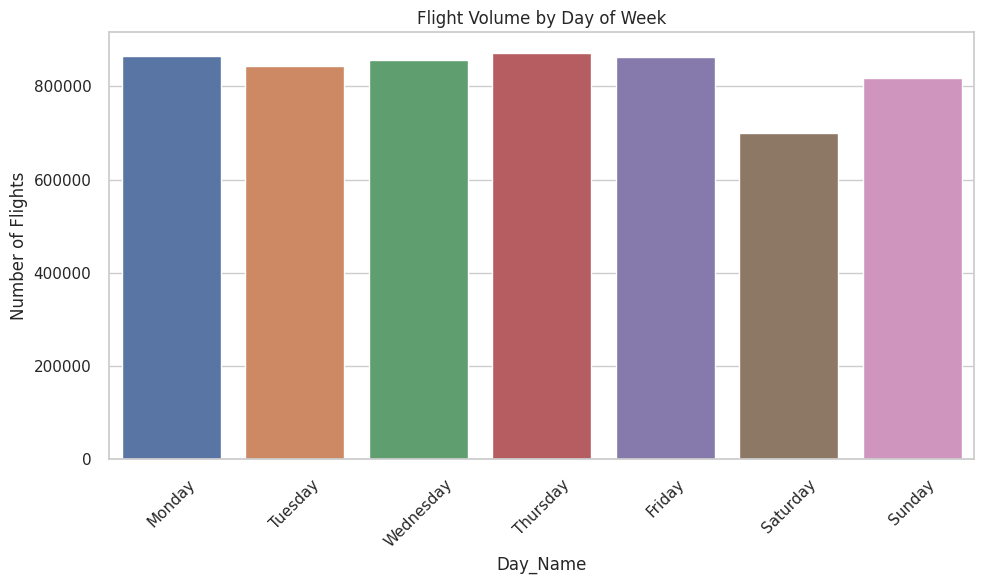

In [54]:
dow_flights = df.groupby('DAY_OF_WEEK').size().reset_index(name='Flight_Count')
dow_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
             5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
dow_flights['Day_Name'] = dow_flights['DAY_OF_WEEK'].map(dow_names)

plt.figure(figsize=(10, 6))
sns.barplot(data=dow_flights, x='Day_Name', y='Flight_Count')
plt.title('Flight Volume by Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top Airlines by Flight Volume**

Top 10 Airlines by Flight Volume:
         Total_Flights  Avg_Departure_Delay  Avg_Arrival_Delay  \
AIRLINE                                                          
WN             1261855                10.58               4.37   
DL              875881                 7.37               0.19   
AA              725984                 8.90               3.45   
OO              588353                 7.80               5.85   
EV              571977                 8.72               6.59   
UA              515723                14.44               5.43   
MQ              294632                10.13               6.46   
B6              267048                11.51               6.68   
US              198715                 6.14               3.71   
AS              172521                 1.79              -0.98   

         Cancelled_Flights  Diverted_Flights  
AIRLINE                                       
WN                   16043              3409  
DL                    3824      

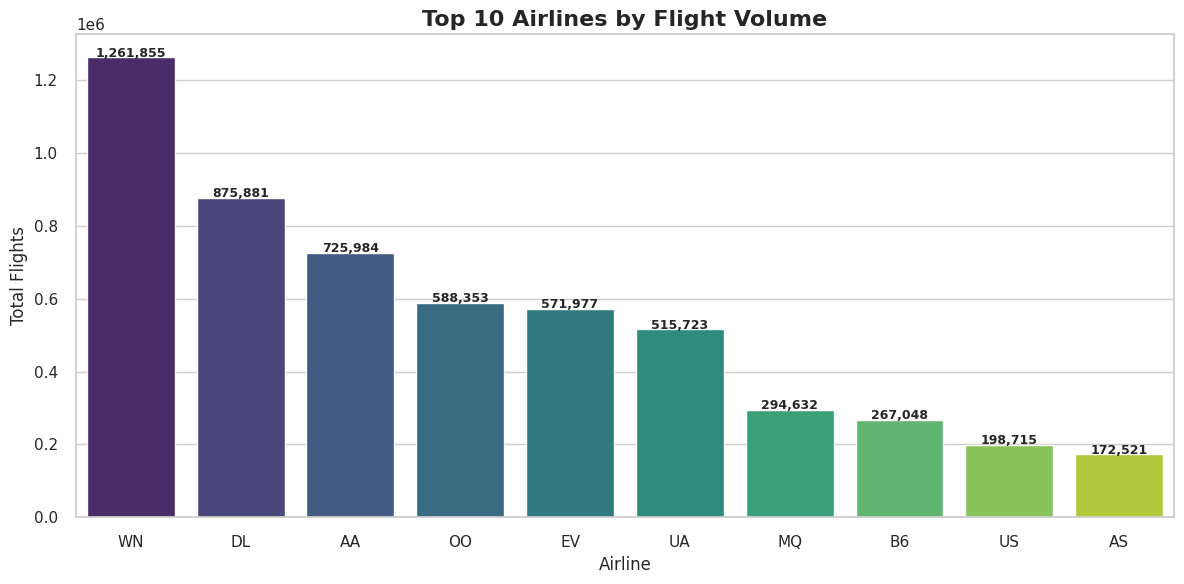

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

airline_stats = df.groupby('AIRLINE').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean',
    'CANCELLED': 'sum',
    'DIVERTED': 'sum'
}).round(2)

airline_stats.columns = ['Total_Flights', 'Avg_Departure_Delay', 'Avg_Arrival_Delay', 
                        'Cancelled_Flights', 'Diverted_Flights']
airline_stats = airline_stats.sort_values('Total_Flights', ascending=False)

print("Top 10 Airlines by Flight Volume:")
print(airline_stats.head(10))

top10 = airline_stats.head(10).reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(
    data=top10,
    x="AIRLINE",
    y="Total_Flights",
    palette="viridis"
)

plt.title("Top 10 Airlines by Flight Volume", fontsize=16, weight="bold")
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Total Flights", fontsize=12)

for index, row in top10.iterrows():
    plt.text(index, row.Total_Flights + 2000, f"{row.Total_Flights:,}", 
             ha='center', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

**Airline performance visualization**

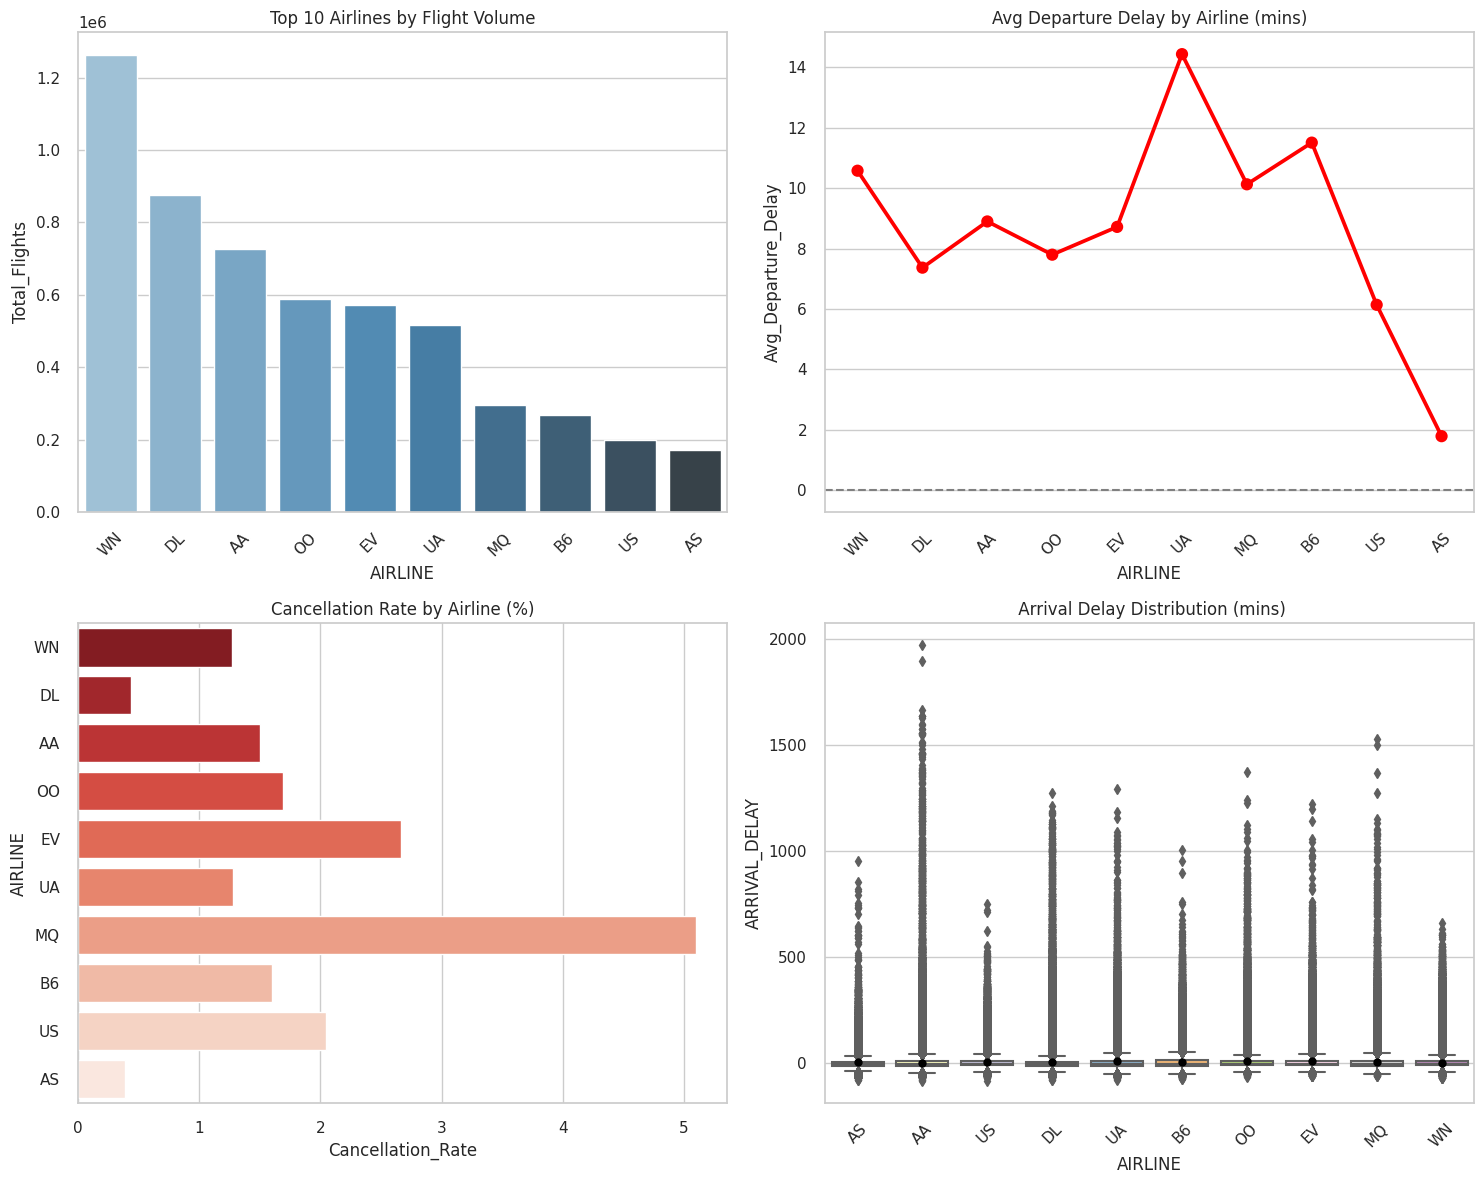

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
top_airlines = airline_stats.head(10).reset_index()

sns.barplot(data=top_airlines, x='AIRLINE', y='Total_Flights', 
            palette="Blues_d", ax=axes[0,0])
axes[0,0].set_title('Top 10 Airlines by Flight Volume')
axes[0,0].tick_params(axis='x', rotation=45)

sns.pointplot(data=top_airlines, x='AIRLINE', y='Avg_Departure_Delay', 
              color="red", ax=axes[0,1])
axes[0,1].set_title('Avg Departure Delay by Airline (mins)')
axes[0,1].axhline(0, color="gray", linestyle="--")
axes[0,1].tick_params(axis='x', rotation=45)

top_airlines['Cancellation_Rate'] = (top_airlines['Cancelled_Flights'] / top_airlines['Total_Flights']) * 100
sns.barplot(data=top_airlines, y='AIRLINE', x='Cancellation_Rate',
            palette="Reds_r", ax=axes[1,0])
axes[1,0].set_title('Cancellation Rate by Airline (%)')

sns.boxplot(data=df[df['AIRLINE'].isin(top_airlines['AIRLINE'])], 
            x='AIRLINE', y='ARRIVAL_DELAY', ax=axes[1,1], palette="Set3")
sns.swarmplot(data=top_airlines, x='AIRLINE', y='Avg_Arrival_Delay',
              color="black", size=6, ax=axes[1,1])
axes[1,1].set_title(' Arrival Delay Distribution (mins)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Filter out cancelled flights for delay analysis and checking distribution for delays**

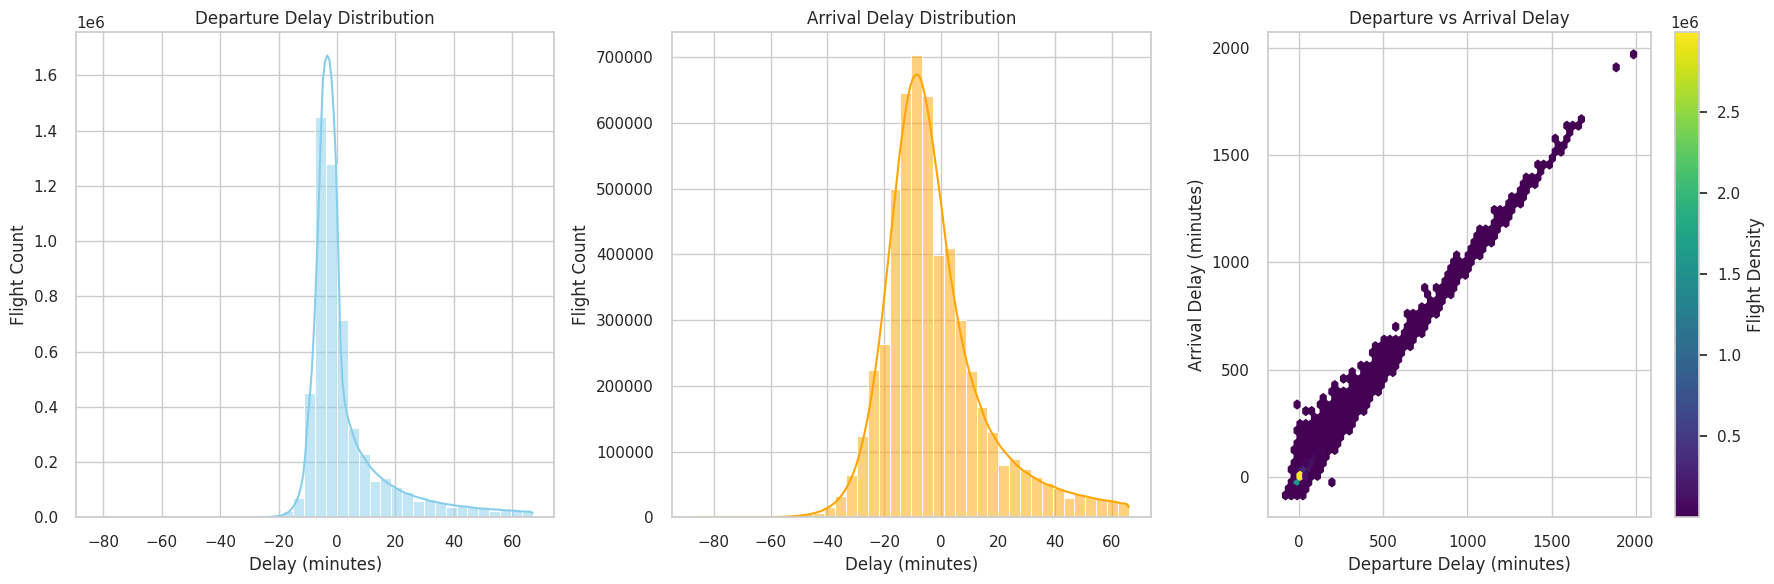

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

active_flights = df[df['CANCELLED'] == 0].copy()

dep_cutoff = np.percentile(active_flights['DEPARTURE_DELAY'].dropna(), 95)
arr_cutoff = np.percentile(active_flights['ARRIVAL_DELAY'].dropna(), 95)

dep_data = active_flights[active_flights['DEPARTURE_DELAY'] <= dep_cutoff]['DEPARTURE_DELAY']
arr_data = active_flights[active_flights['ARRIVAL_DELAY'] <= arr_cutoff]['ARRIVAL_DELAY']

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(dep_data, bins=40, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Departure Delay Distribution")
axes[0].set_xlabel("Delay (minutes)")
axes[0].set_ylabel("Flight Count")

sns.histplot(arr_data, bins=40, kde=True, color="orange", ax=axes[1])
axes[1].set_title("Arrival Delay Distribution")
axes[1].set_xlabel("Delay (minutes)")
axes[1].set_ylabel("Flight Count")

hb = axes[2].hexbin(
    active_flights['DEPARTURE_DELAY'], 
    active_flights['ARRIVAL_DELAY'], 
    gridsize=60, cmap="viridis", mincnt=1
)
axes[2].set_title("Departure vs Arrival Delay")
axes[2].set_xlabel("Departure Delay (minutes)")
axes[2].set_ylabel("Arrival Delay (minutes)")
fig.colorbar(hb, ax=axes[2], label="Flight Density")

plt.tight_layout()
plt.show()

**Delay statistics**

In [58]:
print("Delay Statistics:")

delay_stats = active_flights[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].describe()

delay_stats.loc['median'] = active_flights[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].median()

delay_stats.loc['95%'] = active_flights[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].quantile(0.95)

corr = active_flights['DEPARTURE_DELAY'].corr(active_flights['ARRIVAL_DELAY'])
print(delay_stats.round(2))
print(f"\n Correlation between Departure & Arrival Delay: {corr:.2f}")


Delay Statistics:
        DEPARTURE_DELAY  ARRIVAL_DELAY
count        5729195.00     5714008.00
mean               9.34           4.41
std               36.99          39.27
min              -82.00         -87.00
25%               -5.00         -13.00
50%               -2.00          -5.00
75%                7.00           8.00
max             1988.00        1971.00
median            -2.00          -5.00
95%               67.00          66.00

 Correlation between Departure & Arrival Delay: 0.94


**Delay by month**

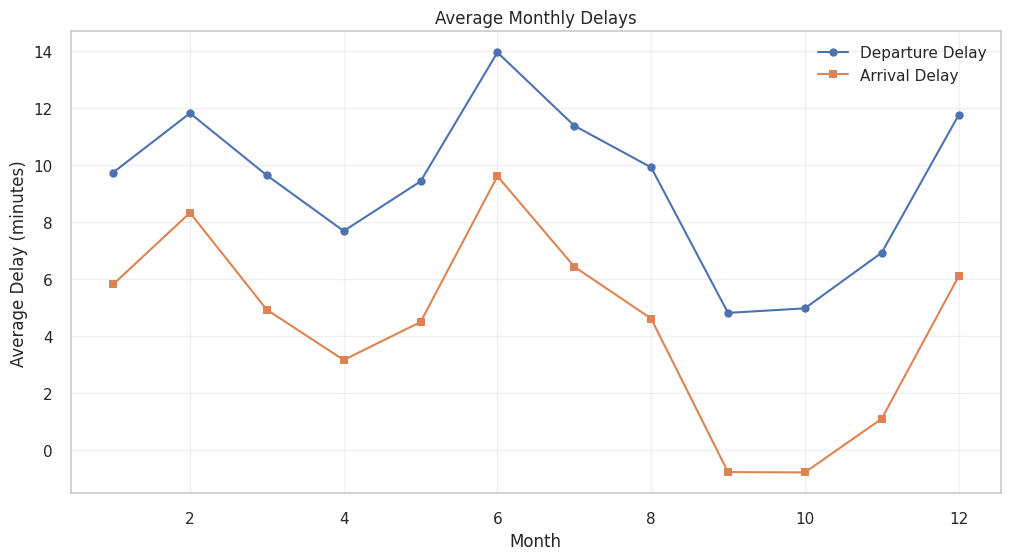

In [59]:
monthly_delays = active_flights.groupby('MONTH').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean'
}).round(2)

plt.figure(figsize=(12, 6))
plt.plot(monthly_delays.index, monthly_delays['DEPARTURE_DELAY'], 
         marker='o', label='Departure Delay')
plt.plot(monthly_delays.index, monthly_delays['ARRIVAL_DELAY'], 
         marker='s', label='Arrival Delay')
plt.title('Average Monthly Delays')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Creating route column**

Top 15 Most Popular Routes:
        Route  Flight_Count
0   SFO → LAX         13744
1   LAX → SFO         13457
2   JFK → LAX         12016
3   LAX → JFK         12015
4   LAS → LAX          9715
5   LGA → ORD          9639
6   LAX → LAS          9594
7   ORD → LGA          9575
8   SFO → JFK          8440
9   JFK → SFO          8437
10  OGG → HNL          8313
11  HNL → OGG          8282
12  LAX → ORD          8256
13  ATL → LGA          8234
14  LGA → ATL          8215


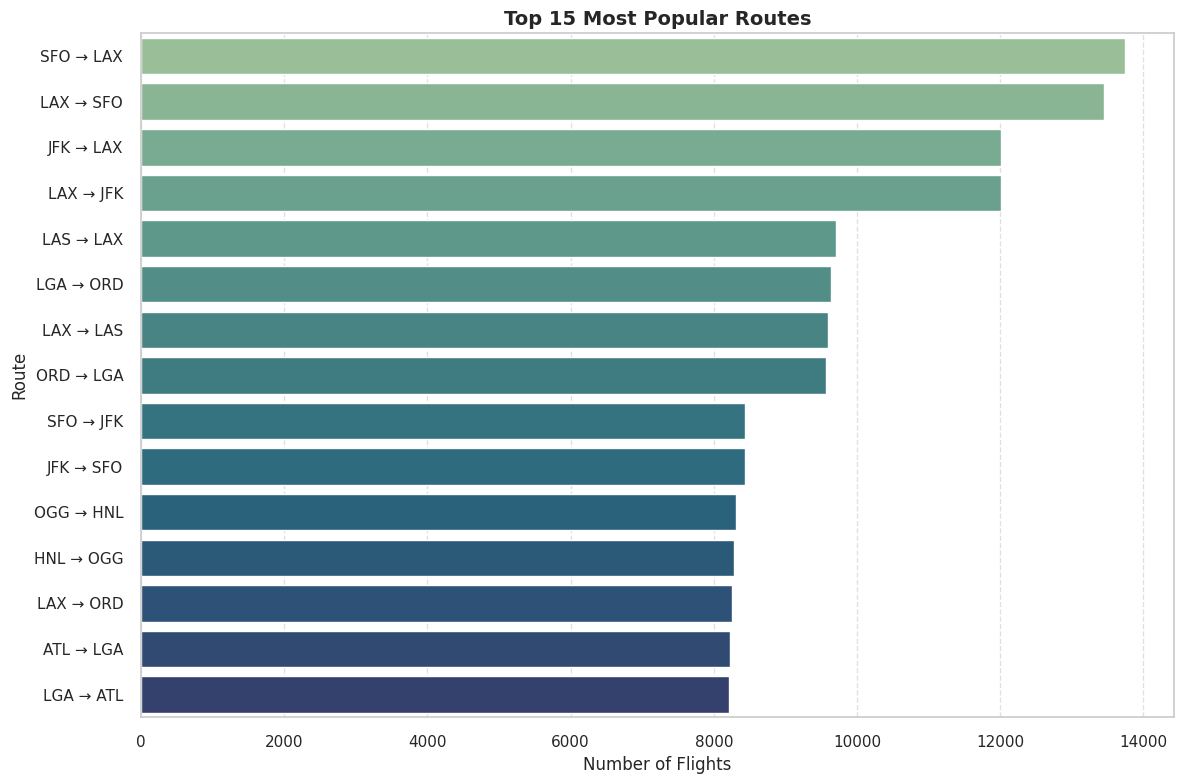

In [60]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype(str)

df['ROUTE'] = df['ORIGIN_AIRPORT'] + " → " + df['DESTINATION_AIRPORT']

popular_routes = df['ROUTE'].value_counts().head(15).reset_index()
popular_routes.columns = ['Route', 'Flight_Count']

print("Top 15 Most Popular Routes:")
print(popular_routes)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=popular_routes,
    y='Route', x='Flight_Count',
    palette='crest'
)
plt.title('Top 15 Most Popular Routes', fontsize=14, weight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Delay by routes**

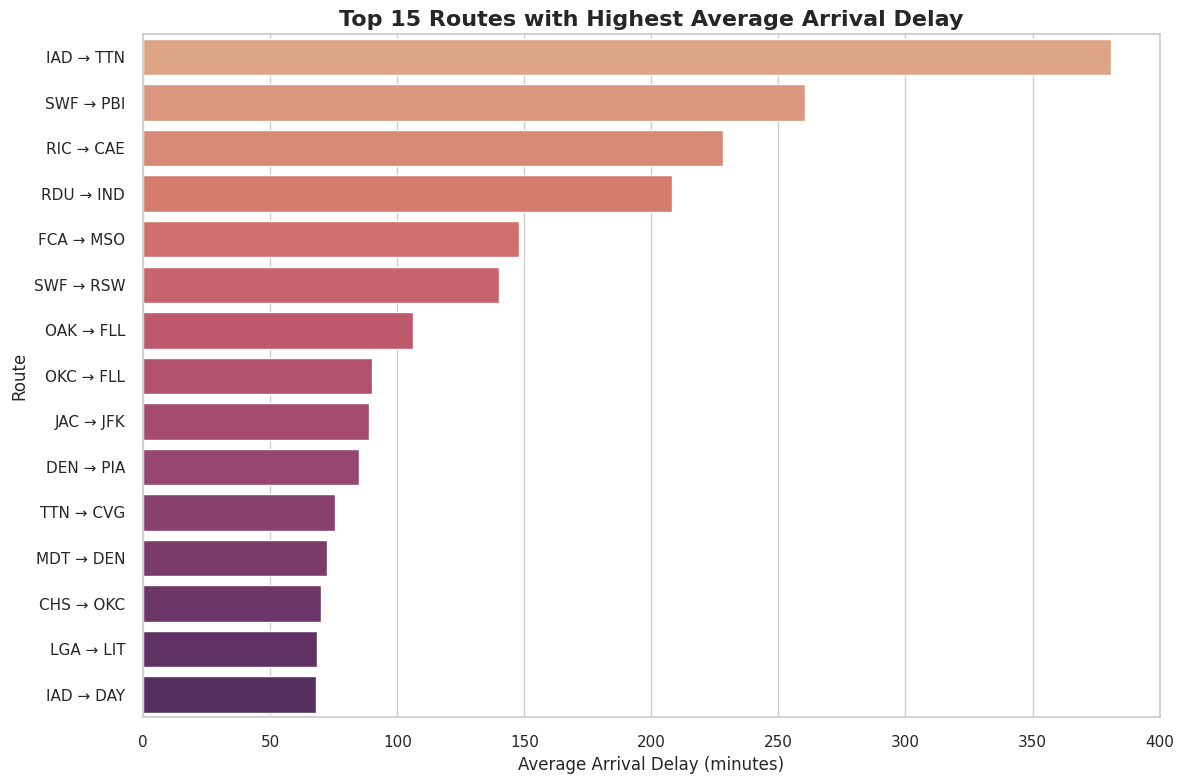

In [61]:
import re

def is_iata(code):
    return bool(re.fullmatch(r'[A-Z]{3}', code))

df['ROUTE'] = df['ORIGIN_AIRPORT'].astype(str) + " → " + df['DESTINATION_AIRPORT'].astype(str)
df_filtered = df[df['ORIGIN_AIRPORT'].apply(is_iata) & df['DESTINATION_AIRPORT'].apply(is_iata)]

active_flights = df_filtered[df_filtered['CANCELLED'] == 0].copy()
route_delay = (
    active_flights.groupby('ROUTE')['ARRIVAL_DELAY']
    .mean().round(2)
    .sort_values(ascending=False)
    .reset_index()
)

top_routes = route_delay.head(15)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("flare", len(top_routes))
sns.barplot(data=top_routes, x='ARRIVAL_DELAY', y='ROUTE', palette=colors)
plt.title('Top 15 Routes with Highest Average Arrival Delay', fontsize=16, fontweight='bold')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Route')
plt.tight_layout()
plt.show()


**Dual plot for 15 best and worst routes**

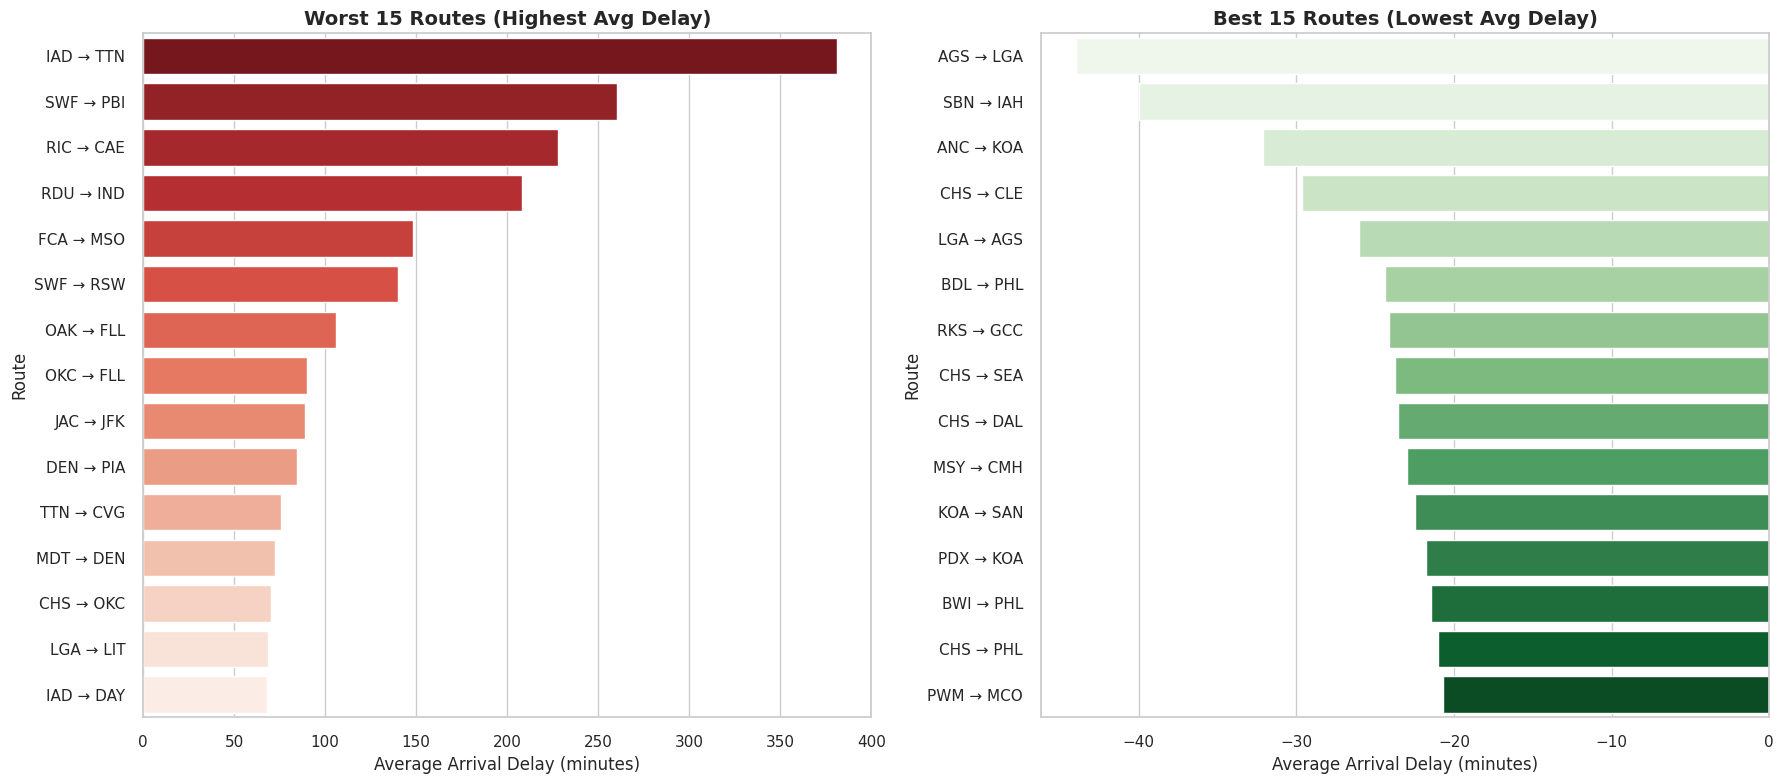

In [62]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

def is_iata(code):
    return bool(re.fullmatch(r'[A-Z]{3}', str(code)))

df['ROUTE'] = df['ORIGIN_AIRPORT'].astype(str) + " → " + df['DESTINATION_AIRPORT'].astype(str)
df_filtered = df[df['ORIGIN_AIRPORT'].apply(is_iata) & df['DESTINATION_AIRPORT'].apply(is_iata)]

active_flights = df_filtered[df_filtered['CANCELLED'] == 0].copy()

route_delay = (
    active_flights.groupby('ROUTE')['ARRIVAL_DELAY']
    .mean().round(2)
    .reset_index()
)

best_routes = route_delay.nsmallest(15, 'ARRIVAL_DELAY')
worst_routes = route_delay.nlargest(15, 'ARRIVAL_DELAY')

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=False)

# Worst routes
sns.barplot(data=worst_routes, x='ARRIVAL_DELAY', y='ROUTE',
            palette="Reds_r", ax=axes[0])
axes[0].set_title("Worst 15 Routes (Highest Avg Delay)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Average Arrival Delay (minutes)")
axes[0].set_ylabel("Route")

# Best routes
sns.barplot(data=best_routes, x='ARRIVAL_DELAY', y='ROUTE',
            palette="Greens", ax=axes[1])
axes[1].set_title("Best 15 Routes (Lowest Avg Delay)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Average Arrival Delay (minutes)")
axes[1].set_ylabel("Route")

plt.tight_layout()
plt.show()

**Delay by day of the week**

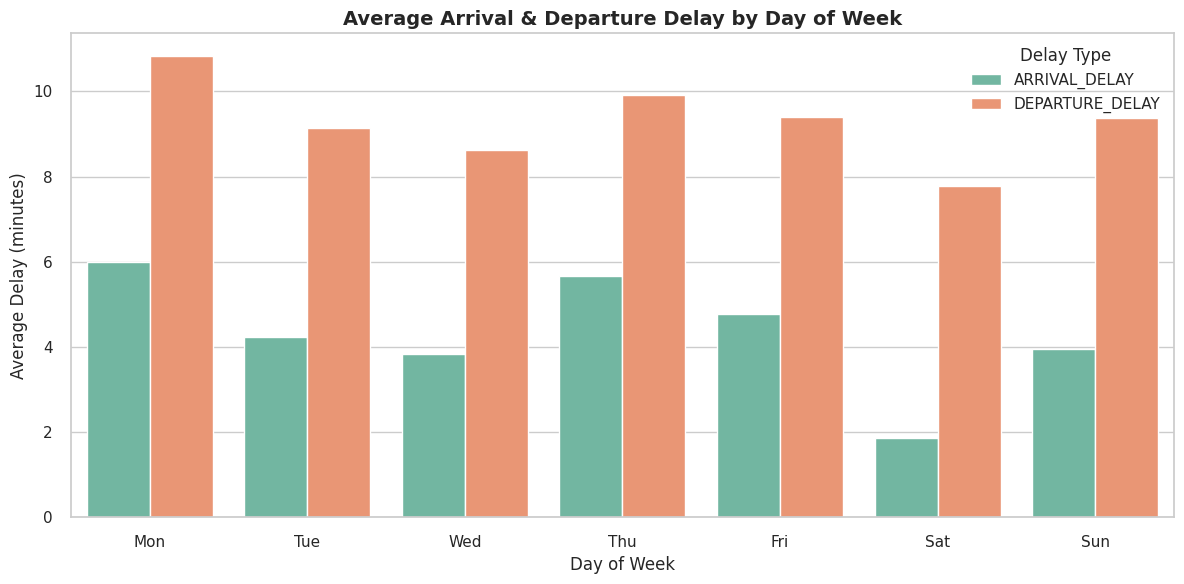

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

active_flights = df[df['CANCELLED'] == 0].copy()

delay_by_day = (
    active_flights.groupby('DAY_OF_WEEK')[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']]
    .mean()
    .reset_index()
)

day_names = {1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat", 7: "Sun"}
delay_by_day['DAY_NAME'] = delay_by_day['DAY_OF_WEEK'].map(day_names)

delay_melted = delay_by_day.melt(
    id_vars=['DAY_NAME'], 
    value_vars=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'],
    var_name='Delay_Type',
    value_name='Avg_Delay'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=delay_melted, x='DAY_NAME', y='Avg_Delay', hue='Delay_Type', palette="Set2")
plt.title("Average Arrival & Departure Delay by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Delay Type")
plt.tight_layout()
plt.show()

**Busiest Airports**

In [64]:
print("\n Busiest Origin Airports:")
busiest_origins = df['ORIGIN_AIRPORT'].value_counts().head(10)
print(busiest_origins)
print("\n Busiest Destination Airports:")
busiest_destinations = df['DESTINATION_AIRPORT'].value_counts().head(10)
print(busiest_destinations)


 Busiest Origin Airports:
ORIGIN_AIRPORT
ATL    346836
ORD    285884
DFW    239551
DEN    196055
LAX    194673
SFO    148008
PHX    146815
IAH    146622
LAS    133181
MSP    112117
Name: count, dtype: int64

 Busiest Destination Airports:
DESTINATION_AIRPORT
ATL    346904
ORD    285906
DFW    239582
DEN    196010
LAX    194696
SFO    147966
PHX    146812
IAH    146683
LAS    133198
MSP    112128
Name: count, dtype: int64


**Airport Performance**


 Top 10 Airport Performance:
                Total_Flights  Avg_Departure_Delay  Avg_Distance
ORIGIN_AIRPORT                                                  
ATL                    344279                 9.33        640.29
ORD                    277336                14.07        722.45
DFW                    233297                11.44        787.67
DEN                    193932                11.81        876.69
LAX                    192509                10.65       1252.54
PHX                    145913                 8.65        967.19
SFO                    145860                11.17       1201.66
IAH                    144492                11.52        826.25
LAS                    132245                10.94        997.37
MSP                    111309                 7.24        810.71


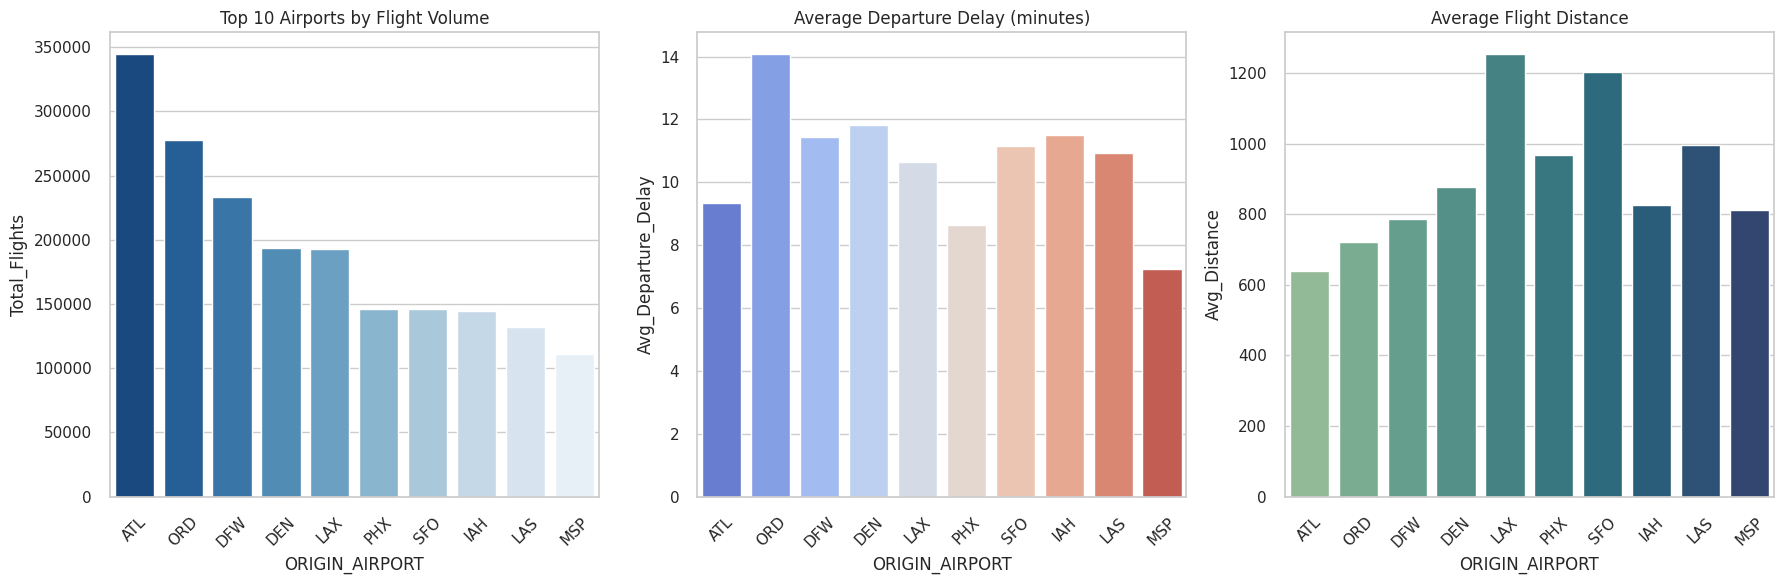

In [65]:
active_flights = df[df['CANCELLED'] == 0].copy()

airport_performance = active_flights.groupby('ORIGIN_AIRPORT').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'DISTANCE': 'mean'
}).round(2)

airport_performance.columns = ['Total_Flights', 'Avg_Departure_Delay', 'Avg_Distance']
airport_performance = airport_performance.sort_values('Total_Flights', ascending=False)

print("\n Top 10 Airport Performance:")
print(airport_performance.head(10))

top_airports = airport_performance.head(10).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=top_airports, x='ORIGIN_AIRPORT', y='Total_Flights',
            palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Airports by Flight Volume')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_airports, x='ORIGIN_AIRPORT', y='Avg_Departure_Delay',
            palette='coolwarm', ax=axes[1])
axes[1].set_title('Average Departure Delay (minutes)')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=top_airports, x='ORIGIN_AIRPORT', y='Avg_Distance',
            palette='crest', ax=axes[2])
axes[2].set_title('Average Flight Distance')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [66]:
print("Distance Statistics:")
print(df['DISTANCE'].describe())

Distance Statistics:
count    5.819079e+06
mean     8.223565e+02
std      6.077843e+02
min      2.100000e+01
25%      3.730000e+02
50%      6.470000e+02
75%      1.062000e+03
max      4.983000e+03
Name: DISTANCE, dtype: float64


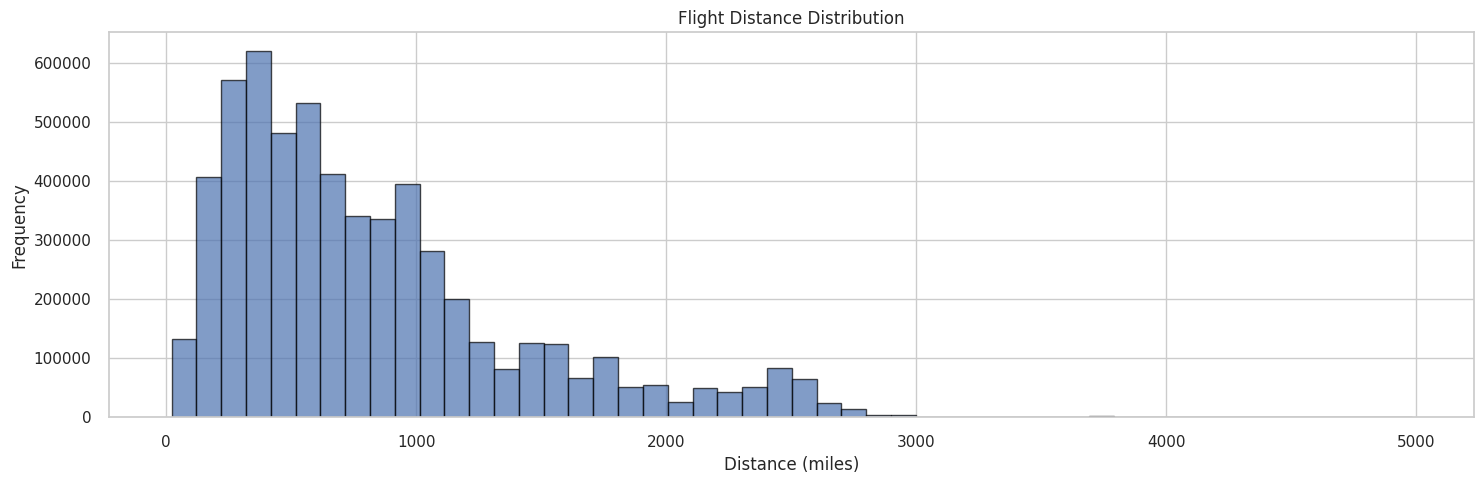

In [67]:
plt.figure(figsize=(15, 5))
plt.hist(df['DISTANCE'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Flight Distance Distribution')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Analyze delay causes (only for flights with delays)**

 Delay Causes Analysis:
       AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
count     950873.000000   950873.000000  950873.000000        950873.000000   
mean          11.977555        0.085162      21.177720            26.251593   
std           28.777464        2.266605      50.467607            44.876877   
min            0.000000        0.000000       0.000000             0.000000   
25%            0.000000        0.000000       0.000000             0.000000   
50%            0.000000        0.000000       5.000000             9.000000   
75%           13.000000        0.000000      21.000000            33.000000   
max         1134.000000      573.000000    1971.000000          1331.000000   

       WEATHER_DELAY  
count  950873.000000  
mean        3.245295  
std        21.575930  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max      1211.000000  

 Average Delay by Cause:
LATE_AIRCRAFT_DELAY    26.25159

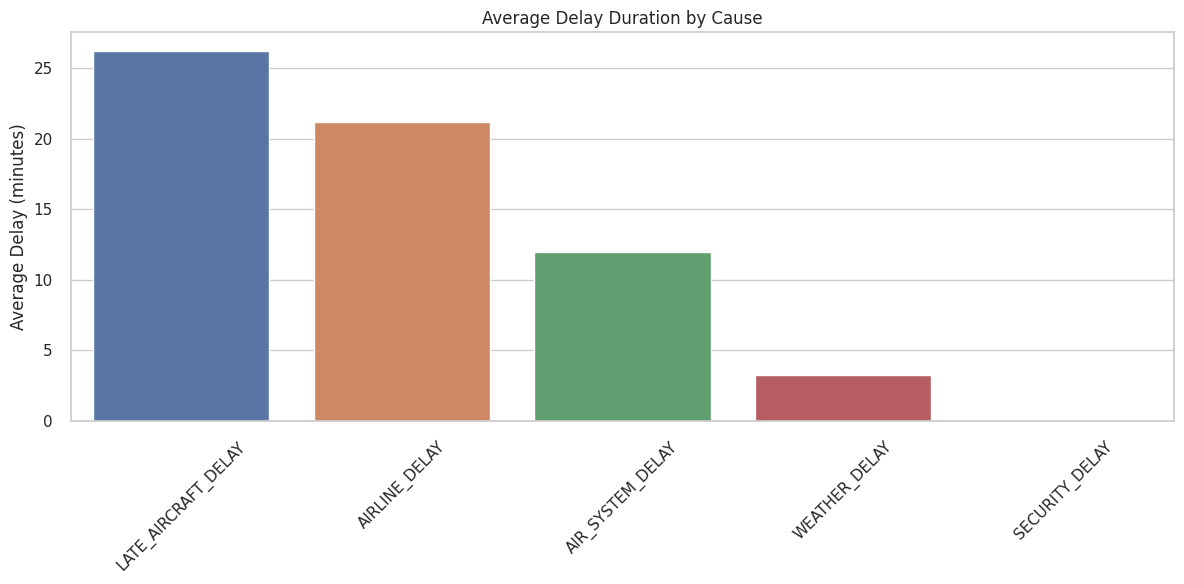

In [68]:
delay_causes = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

delayed_flights = active_flights[active_flights['DEPARTURE_DELAY'] > 0]

print(" Delay Causes Analysis:")
cause_stats = delayed_flights[delay_causes].describe()
print(cause_stats)

avg_delays_by_cause = delayed_flights[delay_causes].mean().sort_values(ascending=False)
print("\n Average Delay by Cause:")
print(avg_delays_by_cause)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delays_by_cause.index, y=avg_delays_by_cause.values)
plt.title('Average Delay Duration by Cause')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Delay cause frequency**

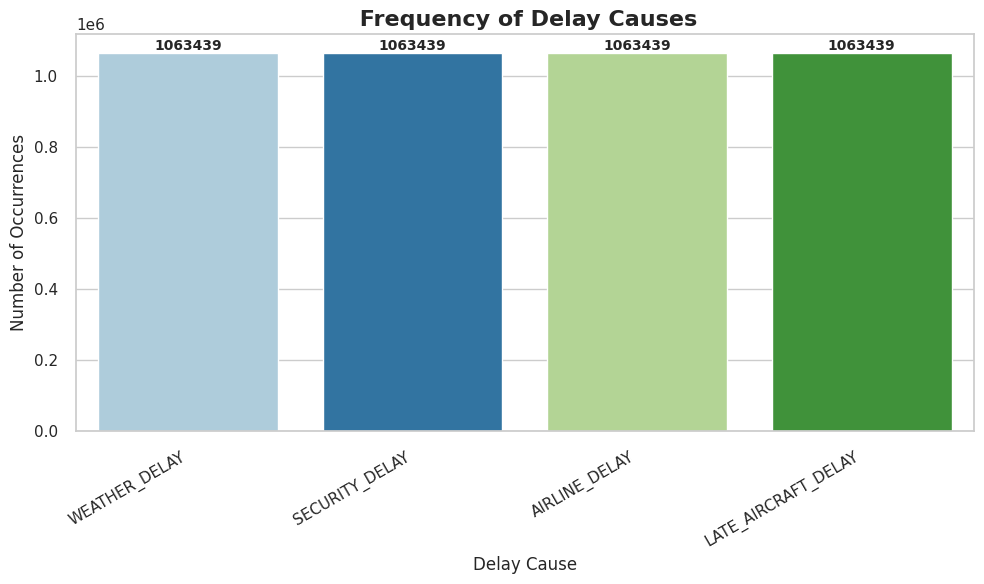

In [69]:
possible_causes = [
    'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
    'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY'
]

delay_causes = [col for col in possible_causes if col in df.columns]

delayed_flights = df[df['ARRIVAL_DELAY'] > 0]

cause_frequency = delayed_flights[delay_causes].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Paired", len(cause_frequency))

sns.barplot(
    x=cause_frequency.index,
    y=cause_frequency.values,
    palette=colors
)

plt.title(' Frequency of Delay Causes', fontsize=16, fontweight='bold')
plt.ylabel('Number of Occurrences')
plt.xlabel('Delay Cause')
plt.xticks(rotation=30, ha='right')

for i, val in enumerate(cause_frequency.values):
    plt.text(i, val + 100, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


**Delay by airline**

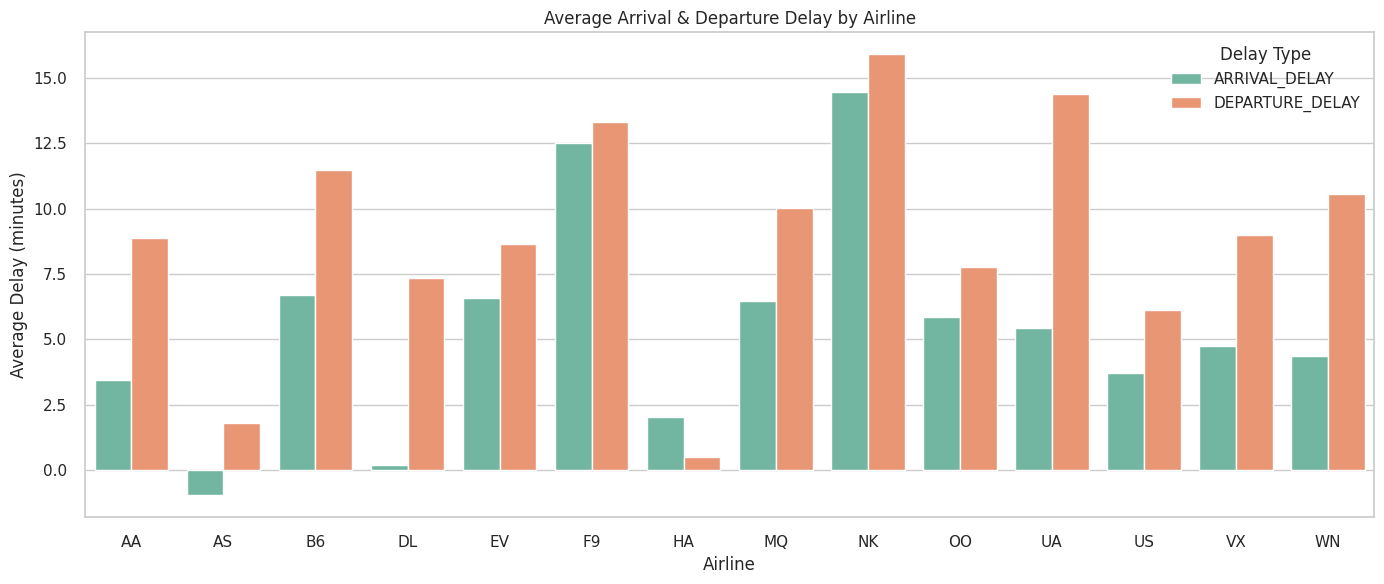

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

active_flights = df[df['CANCELLED'] == 0].copy()

delay_by_airline = (
    active_flights.groupby('AIRLINE')[['ARRIVAL_DELAY', 'DEPARTURE_DELAY']]
    .mean()
    .reset_index()
)

delay_melted = delay_by_airline.melt(
    id_vars=['AIRLINE'], 
    value_vars=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'],
    var_name='Delay_Type',
    value_name='Avg_Delay'
)

plt.figure(figsize=(14, 6))
sns.barplot(data=delay_melted, x='AIRLINE', y='Avg_Delay', hue='Delay_Type', palette="Set2")
plt.title("Average Arrival & Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Delay Type")
plt.tight_layout()
plt.show()

**Delay by airports**

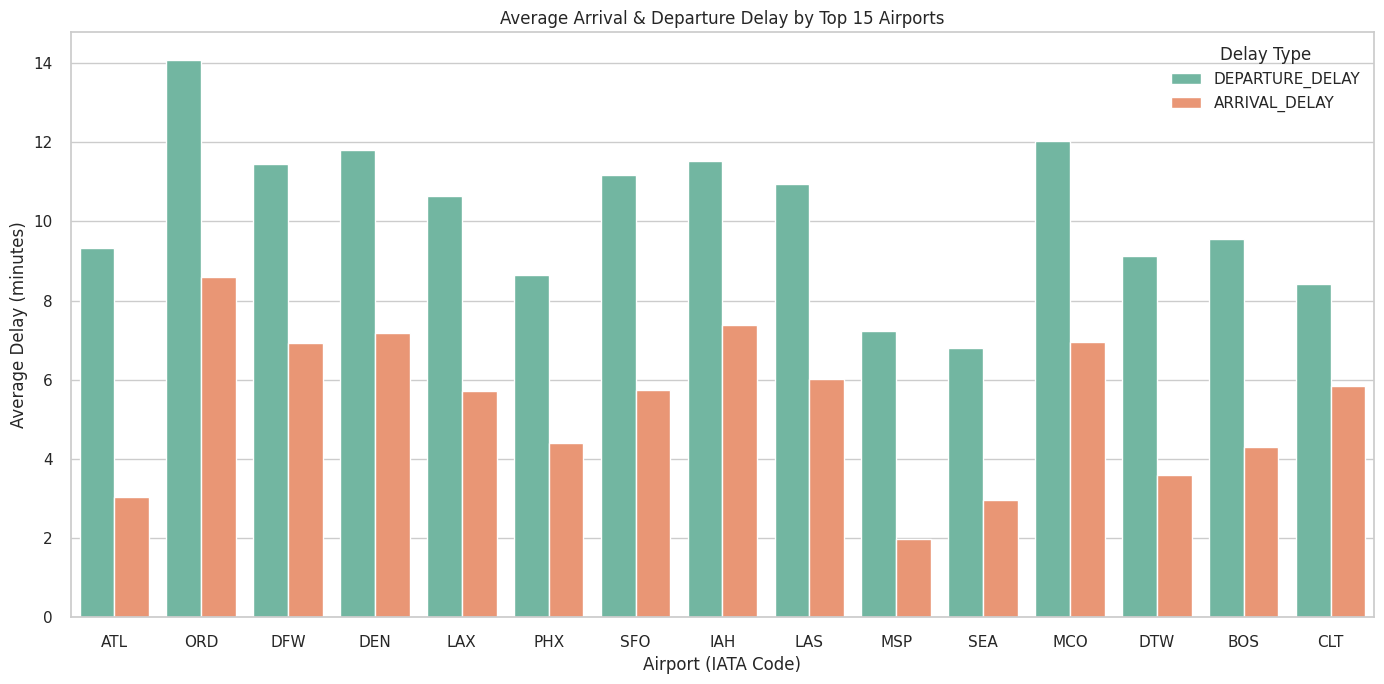

In [71]:
airport_delay = (
    active_flights.groupby('ORIGIN_AIRPORT')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']]
    .mean()
    .reset_index()
)

airport_counts = active_flights['ORIGIN_AIRPORT'].value_counts().reset_index()
airport_counts.columns = ['ORIGIN_AIRPORT', 'Total_Flights']

airport_delay = airport_delay.merge(airport_counts, on='ORIGIN_AIRPORT')
top_airports_delay = airport_delay.sort_values('Total_Flights', ascending=False).head(15)

delay_melted = top_airports_delay.melt(
    id_vars=['ORIGIN_AIRPORT'],
    value_vars=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'],
    var_name='Delay_Type',
    value_name='Avg_Delay'
)

plt.figure(figsize=(14, 7))
sns.barplot(data=delay_melted, x='ORIGIN_AIRPORT', y='Avg_Delay', hue='Delay_Type', palette="Set2")
plt.title("Average Arrival & Departure Delay by Top 15 Airports")
plt.xlabel("Airport (IATA Code)")
plt.ylabel("Average Delay (minutes)")
plt.legend(title="Delay Type")
plt.tight_layout()
plt.show()

**Monthly Cancelled Flights and its distribution**

 Total Cancelled Flights: 89,884

 Cancellation Reasons:
CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

 Top 10 Airlines by Cancellations:
AIRLINE
WN    16043
EV    15231
MQ    15025
AA    10919
OO     9960
UA     6573
B6     4276
US     4067
DL     3824
NK     2004
dtype: int64


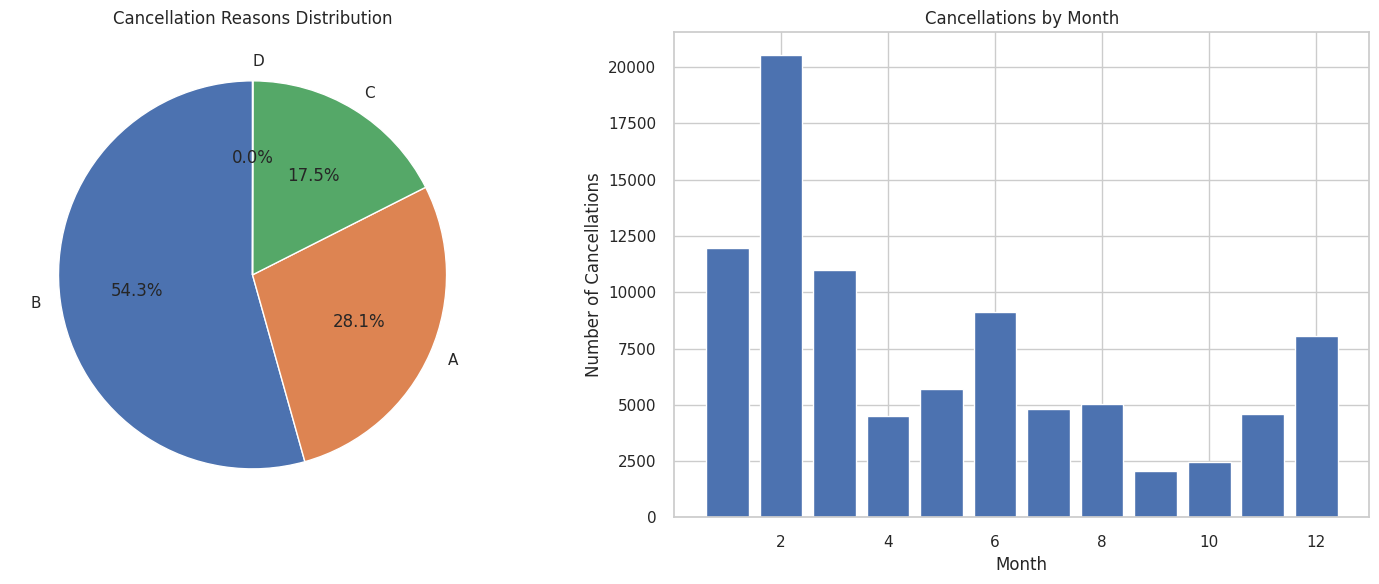

In [72]:
cancelled_flights_df = df[df['CANCELLED'] == 1]

if len(cancelled_flights_df) > 0:
    print(f" Total Cancelled Flights: {len(cancelled_flights_df):,}")
    
    cancellation_reasons = cancelled_flights_df['CANCELLATION_REASON'].value_counts()
    print("\n Cancellation Reasons:")
    print(cancellation_reasons)
    
    airline_cancellations = cancelled_flights_df.groupby('AIRLINE').size().sort_values(ascending=False)
    print("\n Top 10 Airlines by Cancellations:")
    print(airline_cancellations.head(10))
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    if not cancellation_reasons.empty:
        axes[0].pie(cancellation_reasons.values, labels=cancellation_reasons.index, 
                   autopct='%1.1f%%', startangle=90)
        axes[0].set_title('Cancellation Reasons Distribution')
    
    monthly_cancellations = cancelled_flights_df.groupby('MONTH').size()
    axes[1].bar(monthly_cancellations.index, monthly_cancellations.values)
    axes[1].set_title('Cancellations by Month')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Number of Cancellations')
    
    plt.tight_layout()
    plt.show()

**Hour of day analysis (from scheduled departure)**

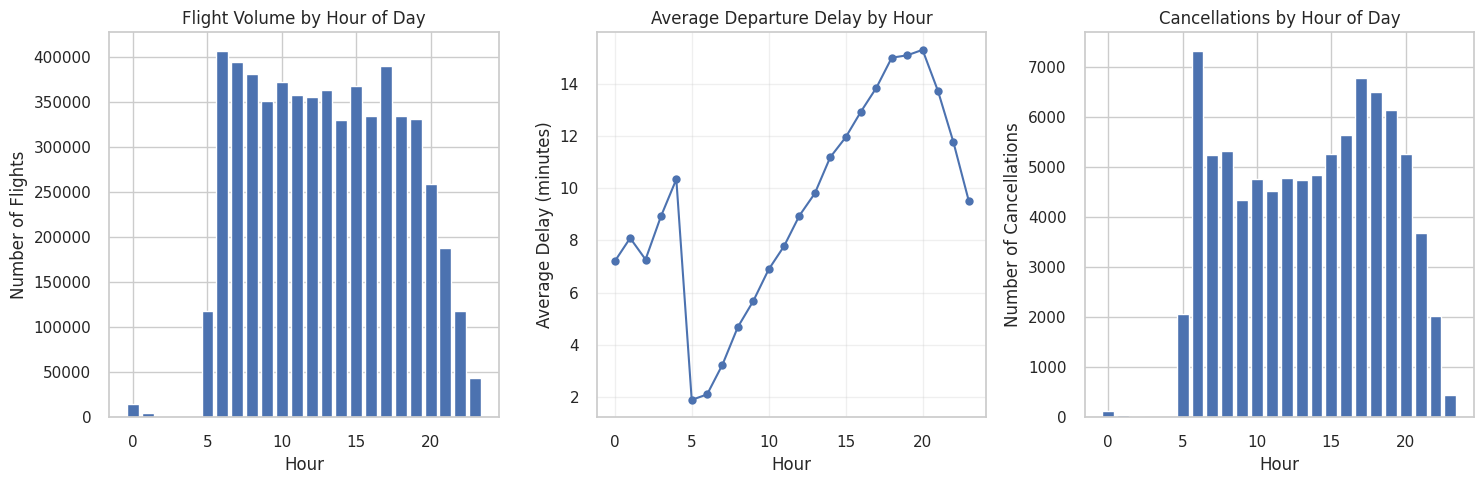

In [73]:
df['DEPARTURE_HOUR'] = (df['SCHEDULED_DEPARTURE'] // 100).astype(int)
hourly_patterns = df.groupby('DEPARTURE_HOUR').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'CANCELLED': 'sum'
}).round(2)

hourly_patterns.columns = ['Flight_Count', 'Avg_Delay', 'Cancellations']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(hourly_patterns.index, hourly_patterns['Flight_Count'])
plt.title('Flight Volume by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Flights')

plt.subplot(1, 3, 2)
plt.plot(hourly_patterns.index, hourly_patterns['Avg_Delay'], marker='o')
plt.title('Average Departure Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(hourly_patterns.index, hourly_patterns['Cancellations'])
plt.title('Cancellations by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Cancellations')

plt.tight_layout()
plt.show()

**Correlation between numeric columns**

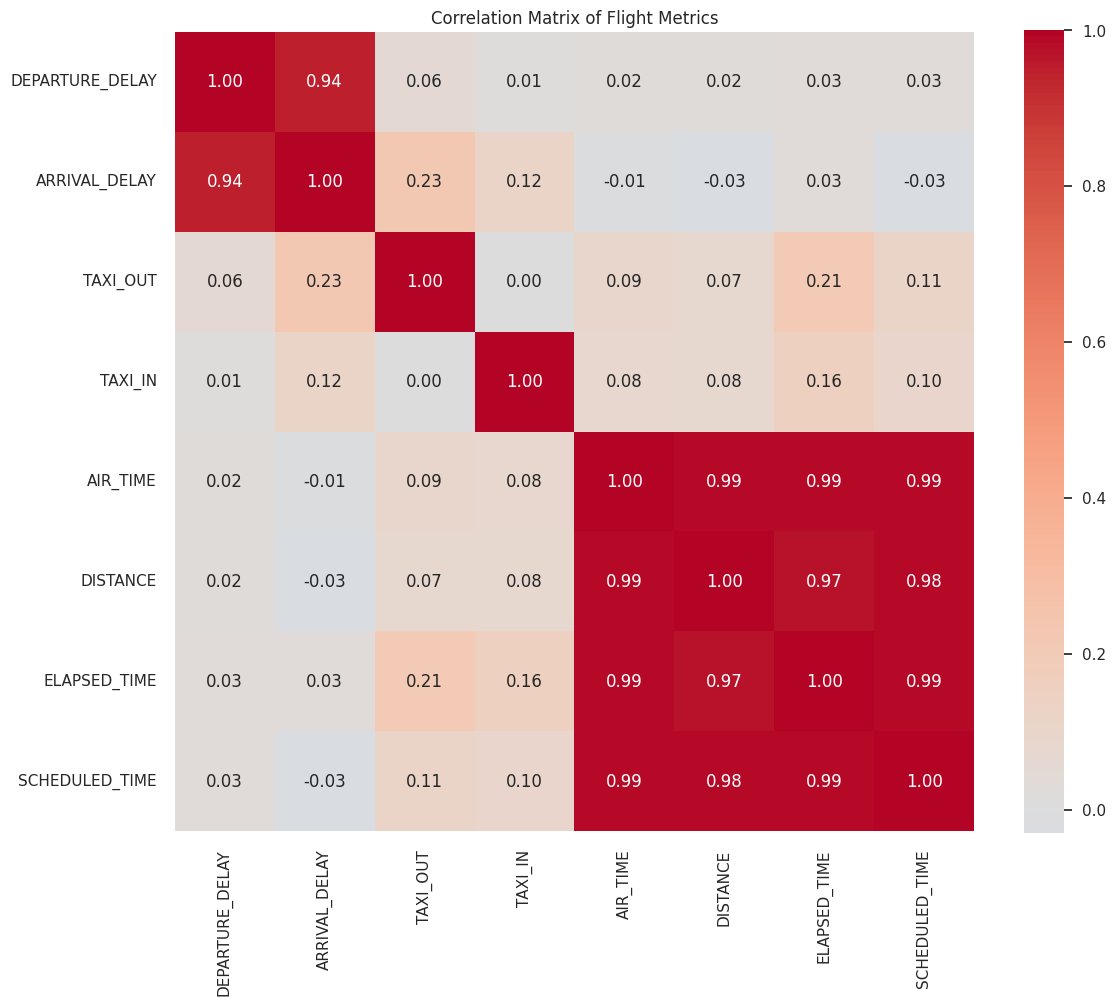

In [74]:
numeric_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 
                'AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'SCHEDULED_TIME']

correlation_matrix = active_flights[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Flight Metrics')
plt.tight_layout()
plt.show()

In [75]:
avg_departure_delay = active_flights['DEPARTURE_DELAY'].mean()
avg_arrival_delay = active_flights['ARRIVAL_DELAY'].mean()
cancellation_rate = (cancelled_flights / total_flights) * 100
busiest_month = monthly_flights.loc[monthly_flights['Flight_Count'].idxmax(), 'Month_Name']
worst_delay_airline = airline_stats.loc[airline_stats['Avg_Departure_Delay'].idxmax()].name

print(f"  Average departure delay: {avg_departure_delay:.1f} minutes")
print(f"  Average arrival delay: {avg_arrival_delay:.1f} minutes")
print(f" Overall cancellation rate: {cancellation_rate:.2f}%")
print(f" Busiest month: {busiest_month}")
print(f" Airline with highest avg delay: {worst_delay_airline}")


  Average departure delay: 9.3 minutes
  Average arrival delay: 4.4 minutes
 Overall cancellation rate: 1.54%
 Busiest month: Jul
 Airline with highest avg delay: NK


**Target variable (Delayed if >= 15 min)**

In [76]:
df['DELAYED'] = (df['ARRIVAL_DELAY'] >= 15).astype(int)

leakage_cols = [
    'DEPARTURE_TIME','DEPARTURE_DELAY','WHEELS_OFF','WHEELS_ON',
    'TAXI_IN','TAXI_OUT','ARRIVAL_TIME','ARRIVAL_DELAY',
    'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY','DIVERTED','CANCELLED','CANCELLATION_REASON'
]
df.drop(columns=leakage_cols, inplace=True, errors="ignore")

df = df.dropna(subset=['YEAR','MONTH','DAY','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT'])

q_low, q_high = df['DISTANCE'].quantile([0.01, 0.99])
df['DISTANCE'] = np.clip(df['DISTANCE'], q_low, q_high)

Drop leakage → prevents data leakage 
Drop NA in critical columns → ensures clean categorical mapping
Winsorize distance → avoids extreme outlier routes dominating splits

In [77]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])

df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

def get_part_of_day(x):
    if 500 <= x < 1200:
        return 'Morning'
    elif 1200 <= x < 1700:
        return 'Afternoon'
    elif 1700 <= x < 2100:
        return 'Evening'
    else:
        return 'Night'
df['PART_OF_DAY'] = df['SCHEDULED_DEPARTURE'].apply(get_part_of_day)

df.sort_values(['ORIGIN_AIRPORT','DATE'], inplace=True)
df['ROLLING_7D_DELAY_ORIGIN'] = (
    df.groupby('ORIGIN_AIRPORT')['DELAYED']
      .rolling(window=7, min_periods=1).mean()
      .reset_index(level=0, drop=True)
)

df['DISTANCE_PER_MINUTE'] = df['DISTANCE'] / (df['SCHEDULED_TIME'] + 1)

Day of week & part of day → captures temporal patterns of congestion/weather
Rolling delay → airport reliability context
Distance/time ratio → distinguishes short vs long flights more meaningfully

In [27]:
pip install -U category_encoders

Note: you may need to restart the kernel to use updated packages.


In [28]:
from category_encoders.target_encoder import TargetEncoder

categorical_cols = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','PART_OF_DAY']

encoder = TargetEncoder(cols=categorical_cols, smoothing=0.3)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols], df['DELAYED'])

Target Encoding? 
Handles high-cardinality (e.g., airports)
Captures correlation with target better than LabelEncoder
Avoids sparse matrices from One-Hot on large categorical features


In [29]:
from sklearn.preprocessing import RobustScaler

num_cols = df.select_dtypes(include=[np.number]).columns.drop('DELAYED')

scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

RobustScaler? 
Resistant to extreme values (common in distance, delay-related data)
Keeps median-centered features → good for skewed distributions


**Feature Selection using VarianceThreshold and mutualInfo class from skLearn**

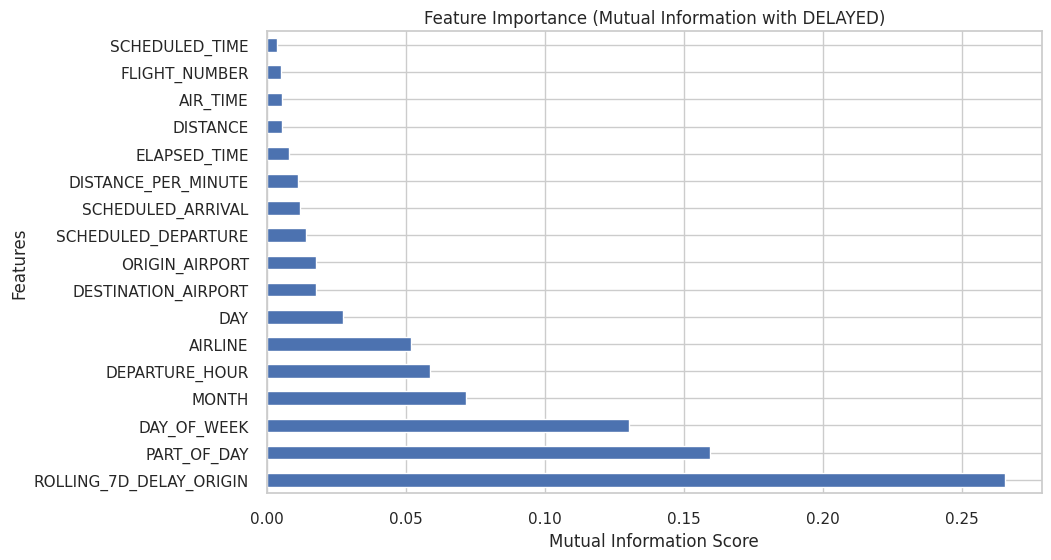

Selected 17 features


In [30]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
import matplotlib.pyplot as plt

X = df.drop(columns=['DELAYED'])
y = df['DELAYED']

X = X.select_dtypes(include=['int64','float64'])

X = X.fillna(X.median())

selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)
kept_features = X.columns[selector.get_support()]

mi_scores = mutual_info_classif(X[kept_features], y, discrete_features=False)
mi_series = pd.Series(mi_scores, index=kept_features).sort_values(ascending=False)

important_features = mi_series[mi_series > 0.001].index.tolist()

df_final = pd.concat([X[important_features], y], axis=1)

plt.figure(figsize=(10,6))
mi_series.plot(kind='barh')
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance (Mutual Information with DELAYED)")
plt.show()

print("Selected", len(important_features), "features")

Feature selection with VarianceThreshold removes features with very low variance, since they provide little to no useful information for distinguishing between classes. Meanwhile, Mutual Information (mutual_info_classif) captures the dependency between features and the target, even when relationships are non-linear. Using both helps reduce noise, improve model generalization, and speed up training by keeping only informative features.

**Clean Dataset**

In [31]:
df_final.to_csv("processed_flight_delays.csv", index=False)

print("Final dataset saved as processed_flight_delays.csv")
print("Shape:", df_final.shape)

Final dataset saved as processed_flight_delays.csv
Shape: (5819079, 18)


In [32]:
import pandas as pd

df_final = pd.read_csv("processed_flight_delays.csv")

X = df_final.drop(columns=['DELAYED'])
y = df_final['DELAYED']

print(" Dataset Loaded:", X.shape, "features,", y.shape, "target")

 Dataset Loaded: (5819079, 17) features, (5819079,) target


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(" Train size:", X_train.shape, " Test size:", X_test.shape)


 Train size: (4655263, 17)  Test size: (1163816, 17)


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

def get_route_delay_stats(df, source, destination, day=None, plot=True):
    """
    Return route-level delay stats + alternate flights (Top 3 airlines).
    Caps extreme ARRIVAL_DELAY to [-60, 300] and rounds delays to integers.
    """

    df = df.copy()

    df["ARRIVAL_DELAY"] = df["DEPARTURE_DELAY"].fillna(0) + df["TAXI_OUT"].fillna(0) - df["TAXI_IN"].fillna(0)

    df["ARRIVAL_DELAY"] = df["ARRIVAL_DELAY"].clip(lower=-60, upper=300)

    df["DELAYED"] = (df["ARRIVAL_DELAY"] > 15).astype(int)

    route_df = df[(df["ORIGIN_AIRPORT"] == source) & (df["DESTINATION_AIRPORT"] == destination)]
    if route_df.empty:
        return {"error": f"No flights found from {source} to {destination}"}

    avg_delay = int(round(route_df["ARRIVAL_DELAY"].mean()))
    prob_delay = round(route_df["DELAYED"].mean(), 2)

    results = {
        "route": f"{source} → {destination}",
        "average_delay_min": avg_delay,
        "probability_of_delay": prob_delay,
    }

    if day is not None:
        same_day = route_df[route_df["DAY"] == day]
        if not same_day.empty:
            results["same_day_stats"] = {
                "average_delay_min": int(round(same_day["ARRIVAL_DELAY"].mean())),
                "probability_of_delay": round(same_day["DELAYED"].mean(), 2),
            }

            alt_flights = (
                same_day.groupby(["AIRLINE", "FLIGHT_NUMBER", "SCHEDULED_DEPARTURE"])
                .agg({"ARRIVAL_DELAY": "mean", "DELAYED": "mean"})
                .reset_index()
                .sort_values("ARRIVAL_DELAY")
            )

            alt_flights["ARRIVAL_DELAY"] = alt_flights["ARRIVAL_DELAY"].round(0).astype(int)
            alt_flights["DELAYED"] = alt_flights["DELAYED"].round(2)

            alt_top3 = (
                alt_flights.groupby("AIRLINE")
                .head(1)  # one best flight per airline
                .sort_values("ARRIVAL_DELAY")
                .head(3)
            )

            results["alternate_flights_top3"] = alt_top3.to_dict(orient="records")

    weekly_stats = (
        route_df.groupby("DAY_OF_WEEK")["ARRIVAL_DELAY"]
        .mean()
        .sort_values()
    )

    results["best_day_to_fly"] = int(weekly_stats.index[0])
    results["worst_day_to_fly"] = int(weekly_stats.index[-1])

    if plot:
        weekly_stats.round(0).astype(int).plot(
            kind="bar", figsize=(6, 4),
            title=f"Avg Delay by Day of Week ({source}→{destination})"
        )
        plt.ylabel("Avg Delay (minutes)")
        plt.show()

    return results

In [79]:
import pandas as pd
df_raw = pd.read_csv("/kaggle/input/flight-delays/flights.csv")
print(df_raw.head())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX                 PBI                   10             2.0   
2            SFO                 CLT                   20            18.0   
3            LAX                 MIA                   20            15.0   
4            SEA                 ANC                   25            24.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        

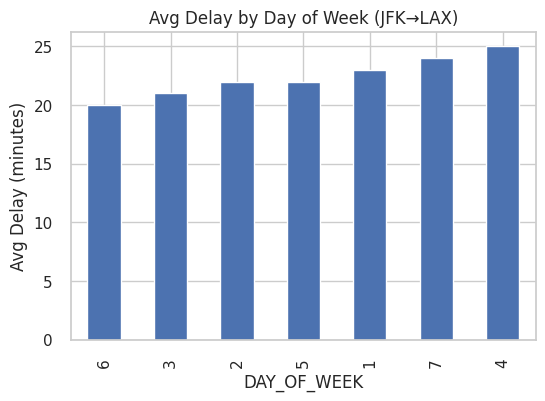

{'alternate_flights_top3': [{'AIRLINE': 'DL',
                             'ARRIVAL_DELAY': -18,
                             'DELAYED': 0.0,
                             'FLIGHT_NUMBER': 424,
                             'SCHEDULED_DEPARTURE': 1355},
                            {'AIRLINE': 'AA',
                             'ARRIVAL_DELAY': -10,
                             'DELAYED': 0.0,
                             'FLIGHT_NUMBER': 171,
                             'SCHEDULED_DEPARTURE': 625},
                            {'AIRLINE': 'UA',
                             'ARRIVAL_DELAY': -4,
                             'DELAYED': 0.0,
                             'FLIGHT_NUMBER': 535,
                             'SCHEDULED_DEPARTURE': 1707}],
 'average_delay_min': 22,
 'best_day_to_fly': 6,
 'probability_of_delay': 0.45,
 'route': 'JFK → LAX',
 'same_day_stats': {'average_delay_min': 28, 'probability_of_delay': 0.53},
 'worst_day_to_fly': 4}


In [80]:
stats = get_route_delay_stats(
    df_raw, 
    source="JFK", 
    destination="LAX", 
    day=15, 
    plot=True
)

import pprint
pprint.pprint(stats)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df  = pd.read_csv("/kaggle/input/flight-delays/flights.csv")
active_flights = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()

active_flights["DELAYED_15"] = (active_flights["ARRIVAL_DELAY"] > 15).astype(int)

print("Target distribution:")
print(active_flights["DELAYED_15"].value_counts(normalize=True))

features = [
    "MONTH", "DAY", "DAY_OF_WEEK",
    "AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT",
    "SCHEDULED_DEPARTURE", "DISTANCE"
]

X = active_flights[features]
y = active_flights["DELAYED_15"]

Target distribution:
DELAYED_15
0    0.820879
1    0.179121
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("/kaggle/input/flight-delays/flights.csv")

df['ARRIVAL_DELAY_BINARY'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

features = ['MONTH','DAY','DAY_OF_WEEK','AIRLINE',
            'FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
            'SCHEDULED_DEPARTURE','DISTANCE']
X = df[features].copy()
y = df['ARRIVAL_DELAY_BINARY']

cat_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
for col in cat_cols:
    X[col] = X[col].astype(str)  # convert to string before encoding

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import datetime

def preprocess_input(flight_date, airline, origin, destination, sched_departure, desired_arrival, le_dict, model, df):
    """
    flight_date: string in 'YYYY-MM-DD'
    airline: string airline code (e.g., 'AA')
    origin: string airport code (e.g., 'ATL')
    destination: string airport code (e.g., 'LAX')
    sched_departure: int in HHMM format (e.g., 1330 for 1:30 PM)
    desired_arrival: string 'HH:MM' in 24hr format (user's desired arrival time)
    """
    date_obj = datetime.datetime.strptime(flight_date, "%Y-%m-%d")
    month = date_obj.month
    day = date_obj.day
    day_of_week = date_obj.isoweekday()  # 1=Mon ... 7=Sun

    try:
        distance = int(df[(df["ORIGIN_AIRPORT"]==origin) & (df["DESTINATION_AIRPORT"]==destination)]["DISTANCE"].mean())
    except:
        distance = int(df["DISTANCE"].mean())

    input_dict = {
        "MONTH": [month],
        "DAY": [day],
        "DAY_OF_WEEK": [day_of_week],
        "AIRLINE": [airline],
        "FLIGHT_NUMBER": [0],  # not needed, set dummy
        "ORIGIN_AIRPORT": [origin],
        "DESTINATION_AIRPORT": [destination],
        "SCHEDULED_DEPARTURE": [sched_departure],
        "DISTANCE": [distance]
    }
    input_df = pd.DataFrame(input_dict)

    for col in ["AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]:
        input_df[col] = input_df[col].astype(str)
        le = le_dict[col]
        if input_df[col].iloc[0] in le.classes_:
            input_df[col] = le.transform(input_df[col])
        else:
            input_df[col] = 0

    prob_delay = model.predict_proba(input_df)[:,1][0]

    est_flight_time = distance / 500 * 60   # minutes
    sched_arrival_minutes = (sched_departure//100)*60 + (sched_departure%100) + est_flight_time
    desired_arrival_minutes = int(desired_arrival.split(":")[0])*60 + int(desired_arrival.split(":")[1])

    prob_on_time = 1 - prob_delay if sched_arrival_minutes <= desired_arrival_minutes else 0.2

    return prob_delay, prob_on_time


def suggest_alternatives(user_input, df, le_dict, model):
    origin, dest, date_str = user_input["origin"], user_input["destination"], user_input["date"]

    candidates = df[(df["ORIGIN_AIRPORT"]==origin) & 
                    (df["DESTINATION_AIRPORT"]==dest)].sample(20, random_state=42)

    results = []
    for _, row in candidates.iterrows():
        prob_delay, _ = preprocess_input(
            flight_date=date_str,
            airline=row["AIRLINE"],
            origin=row["ORIGIN_AIRPORT"],
            destination=row["DESTINATION_AIRPORT"],
            sched_departure=row["SCHEDULED_DEPARTURE"],
            desired_arrival="23:59", # not relevant here
            le_dict=le_dict,
            model=model,
            df=df
        )
        results.append((row["AIRLINE"], row["SCHEDULED_DEPARTURE"], prob_delay))

    results = sorted(results, key=lambda x: x[2])[:5]
    return results

In [ ]:
user_input = {
    "date": "2015-06-15",
    "airline": "AA",
    "origin": "ATL",
    "destination": "LAX",
    "sched_departure": 1330,
    "desired_arrival": "18:00"
}

prob_delay, prob_on_time = preprocess_input(
    flight_date=user_input["date"],
    airline=user_input["airline"],
    origin=user_input["origin"],
    destination=user_input["destination"],
    sched_departure=user_input["sched_departure"],
    desired_arrival=user_input["desired_arrival"],
    le_dict=le_dict,
    model=xgb_model,
    df=df
)

print(f" Probability of Delay: {prob_delay:.2f}")
print(f" Probability of arriving by {user_input['desired_arrival']}: {prob_on_time:.2f}")

alts = suggest_alternatives(user_input, df, le_dict, xgb_model)
print("\n Alternative Flights (Airline, Departure, Prob Delay):")
for alt in alts:
    print(alt)